In [19]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm

In [9]:
import PIL.Image

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [20]:
print(len(tf.config.experimental.list_physical_devices('GPU')))


0


In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100


226/226 [==============================] - 197s 862ms/step - loss: 1.8244 - accuracy: 0.2438 - val_loss: 1.8102 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 189s 834ms/step - loss: 1.8045 - accuracy: 0.2496 - val_loss: 1.7738 - val_accuracy: 0.2580
Epoch 3/100
226/226 [==============================] - 217s 963ms/step - loss: 1.7336 - accuracy: 0.2856 - val_loss: 1.6350 - val_accuracy: 0.3344
Epoch 4/100
226/226 [==============================] - 220s 975ms/step - loss: 1.6180 - accuracy: 0.3608 - val_loss: 1.4489 - val_accuracy: 0.4377
Epoch 5/100
226/226 [==============================] - 213s 944ms/step - loss: 1.5110 - accuracy: 0.4121 - val_loss: 1.3810 - val_accuracy: 0.4738
Epoch 6/100
226/226 [==============================] - 213s 942ms/step - loss: 1.4524 - accuracy: 0.4393 - val_loss: 1.3442 - val_accuracy: 0.4884
Epoch 7/100
226/226 [==============================] - 212s 940ms/step - loss: 1.4084 - accuracy: 0.4583 - val_loss:

In [3]:
# model_json = model.to_json()
# with open("emotiondetector.json",'w') as json_file:
#     json_file.write(model_json)
# model.save("emotiondetector.h5")

In [11]:
from keras.models import model_from_json

In [14]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [15]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [21]:
def ef(image):
    img = load_img(image, color_mode = "grayscale" )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [22]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 49ms/step
model prediction is  sad


In [27]:
!pip install matplotlib

     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/159.4 kB ? eta -:--:--
     --------- --------------------------- 41.0/159.4 kB 393.8 kB/s eta 0:00:01
     ------------------- ----------------- 81.9/159.4 kB 657.6 kB/s eta 0:00:01
     -------------------------------- --- 143.4/159.4 kB 774.0 kB/s eta 0:00:01
     ------------------------------------ 159.4/159.4 kB 797.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.6 MB 5.9 MB/s eta 0:00:02
   - -------------------------------------- 0.2/7.6 MB 2.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/7.6 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/7.6 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.6 MB 4.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.6 MB 4.7 MB/s eta 0:00:02
   -----

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 42ms/step
model prediction is  sad


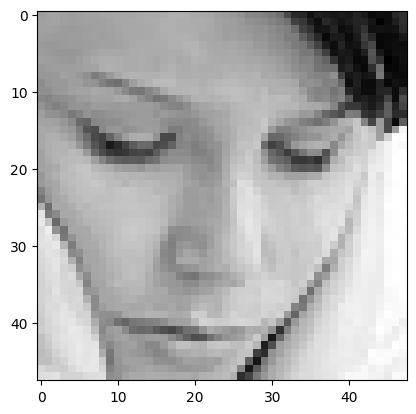

In [29]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
